In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, normaltest
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
import pingouin as pg

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
#PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2
PHASE_COLORS = ['#c8abc9','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V3

#dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
#act_directory = 'C:\\Users\insan\\Desktop\\Analysis_Cache_Aug23'

act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

current_version = 0 #June 23nd, 2023
current_version = 1 # July 21st 2023

stdfont = 14
stdyfrac = 0.06


In [2]:
animals = np.concatenate((dualanimalnames,[]))

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
Error loading P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
ERROR: MULTIPLE REVERSALS IN ANIMAL BS_179
P:\Behavioor\BS_191\b

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

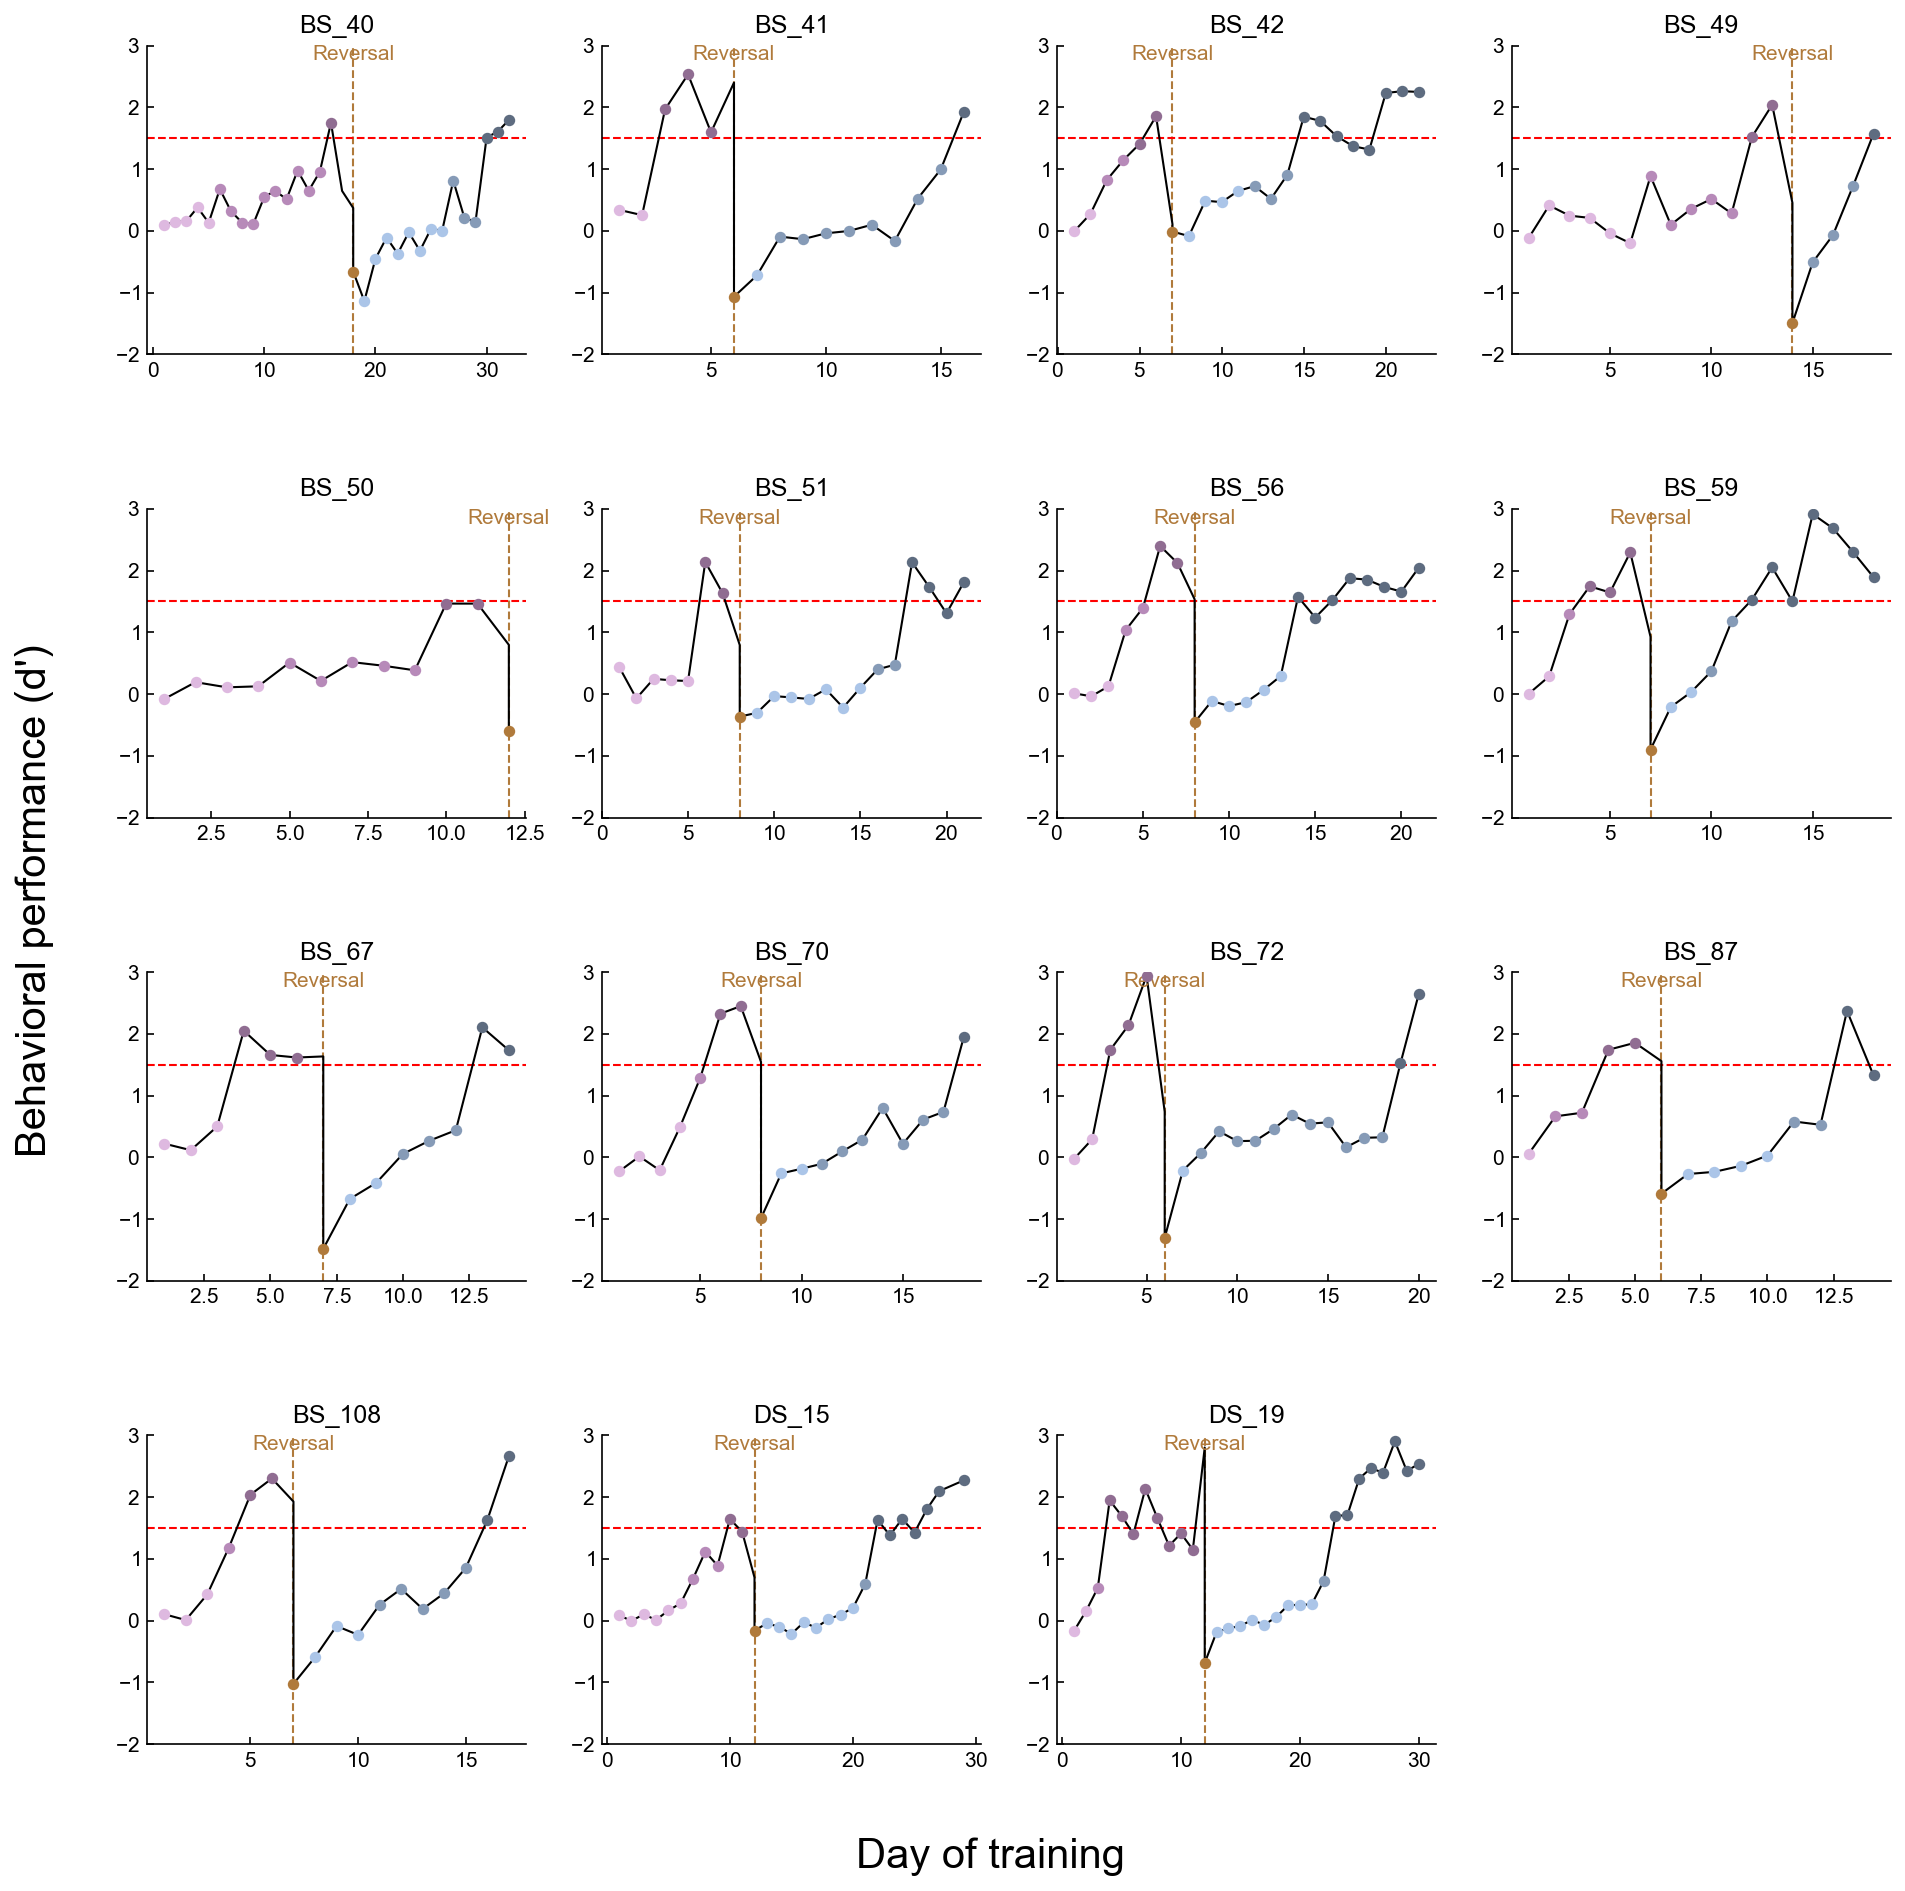

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [46]:
animals_list = []
learning_phases_list = []
avg_dp_list = []

for animal in tqdm(animals):
    
    this_pre_early_dps = []
    this_pre_late_dps = []
    this_pre_expert_dps = []
    this_post_early_dps = []
    this_post_late_dps = []
    this_post_expert_dps = []
    
    reversal = np.nan
    second_reversal = np.nan

    days = list(np.unique(list(animalBehaviors[animal].sessions.keys())))
    if hasattr(animalBehaviors[animal],'reversal') and np.isfinite(animalBehaviors[animal].reversal):
        reversal = animalBehaviors[animal].reversal
        days.append(reversal)
    if hasattr(animalBehaviors[animal],'second_reversal') and np.isfinite(animalBehaviors[animal].second_reversal):
        second_reversal = animalBehaviors[animal].second_reversal
        days.append(second_reversal)
    days = np.sort(days)
    #Needs days
    expert_days = np.concatenate(( learning_phases[animal].pre_expert_days,learning_phases[animal].post_expert_days,learning_phases[animal].second_expert_days ))
    dp_list,pc_list = ilep.getPCDPfromBehavior(animalBehaviors,animal,days,expert_days)
    
    for day_idx,day in enumerate(days):
        if day in learning_phases[animal].pre_early_days:
            this_pre_early_dps.append(dp_list[day_idx])
            this_pre_early_pcs.append(pc_list[day_idx])
        if day in learning_phases[animal].pre_late_days:
            this_pre_late_dps.append(dp_list[day_idx])
            this_pre_late_pcs.append(pc_list[day_idx])
        if day in learning_phases[animal].pre_expert_days:
            this_pre_expert_dps.append(dp_list[day_idx])
            this_pre_expert_pcs.append(pc_list[day_idx])
        if day in learning_phases[animal].post_early_days:
            this_post_early_dps.append(dp_list[day_idx])
            this_post_early_pcs.append(pc_list[day_idx])
        if day in learning_phases[animal].post_late_days:
            this_post_late_dps.append(dp_list[day_idx])
            this_post_late_pcs.append(pc_list[day_idx])
        if day in learning_phases[animal].post_expert_days:
            this_post_expert_dps.append(dp_list[day_idx])
            this_post_expert_pcs.append(pc_list[day_idx])
            
    print(this_pre_early_dps)
            
    # print(f"animal {animal} has pre_late dp of {np.nanmean(this_pre_late_dps)}")
    # print(f"animal {animal} has pre_late min dp of {np.min(this_pre_late_dps)}")
    # print(f"animal {animal} has pre_late max dp of {np.max(this_pre_late_dps)}")
    #print(this_pre_late_dps)
    
    pre_early_dp = np.mean(this_pre_early_dps)
    pre_late_dp = np.mean(this_pre_late_dps)
    pre_expert_dp = np.mean(this_pre_expert_dps)
    post_early_dp = np.mean(this_post_early_dps)
    post_late_dp = np.mean(this_post_late_dps)
    post_expert_dp = np.mean(this_post_expert_dps)
    
    
    
    
    
    
    animals_list.append(animal)
    learning_phases_list.append('pre early')
    avg_dp_list.append(pre_early_dp)
    
    animals_list.append(animal)
    learning_phases_list.append('pre late')
    avg_dp_list.append(pre_late_dp)
    
    animals_list.append(animal)
    learning_phases_list.append('pre expert')
    avg_dp_list.append(pre_expert_dp)
    
    animals_list.append(animal)
    learning_phases_list.append('post early')
    avg_dp_list.append(post_early_dp)
    
    animals_list.append(animal)
    learning_phases_list.append('post late')
    avg_dp_list.append(post_late_dp)
    
    animals_list.append(animal)
    learning_phases_list.append('post expert')
    avg_dp_list.append(post_expert_dp)
    
# print(animals_list)
# print(learning_phases_list)
# print(avg_dp_list)

# print(len(animals_list))
# print(len(learning_phases_list))
# print(len(avg_dp_list))

 40%|████      | 6/15 [00:00<00:00, 51.93it/s]

[0.10143870664312599, 0.13747056969430654, 0.16114767816997105, 0.37810050938117873, 0.13066799499474524]
[0.3390916443896751, 0.2535617622697345]
[-0.010428462020478202, 0.2733067248473744]
[-0.11003673643195, 0.4108796768537688, 0.24592819279988953, 0.20910163672141568, -0.04103203260854227, -0.20045666054678501]
[-0.07923551679668822, 0.19363000335047684, 0.10976742002885315, 0.1261876825480146]
[0.44108849258042876, -0.06961765835983402, 0.2472043365228067, 0.22381910953320583, 0.2116256484487965]
[0.013072633913875642, -0.03547696013501074, 0.12648658038644361]
[0.00829425059213118, 0.28796781478175587]
[0.22333219217632827, 0.1170719964133009, 0.5009665918390012]


100%|██████████| 15/15 [00:00<00:00, 37.63it/s]

[-0.22602723763734822, 0.01606811079704462, -0.20800804601429634, 0.49016044459348773]
[-0.024339982848792352, 0.29368628205223546]
[0.06326054917403019]
[0.10547308215092022, 0.01063494689106037, 0.42674175836952055]
[0.08613846028136231, -0.0020303447725471546, 0.10257312214791975, 0.01244587775733963, 0.16617683199513594, 0.28065596287853234]
[-0.16578111886071578, 0.1517062911163669]


In [47]:
df_dict = dict()
df_dict['animal'] = animals_list
df_dict['learning phase'] = learning_phases_list
df_dict['average d\''] = avg_dp_list
df = pd.DataFrame(df_dict)

In [48]:
df

,animal,learning phase,average d'
0,BS_40,pre early,0.181765
1,BS_40,pre late,0.552447
2,BS_40,pre expert,1.750686
3,BS_40,post early,-0.298132
4,BS_40,post late,0.389844
...,...,...,...
85,DS_19,pre late,0.529155
86,DS_19,pre expert,1.579096
87,DS_19,post early,0.042465
88,DS_19,post late,0.639231


In [52]:
df.to_csv('D:\Manuscript Source Data\Fig 1c.csv')

In [49]:
pre_early_dps = []
pre_late_dps = []
pre_expert_dps = []
post_early_dps = []
post_late_dps = []
post_expert_dps = []

for row in df.iloc:
    if row['learning phase'] == 'pre early':
        pre_early_dps.append(row['average d\''])
    if row['learning phase'] == 'pre late':
        pre_late_dps.append(row['average d\''])
    if row['learning phase'] == 'pre expert':
        pre_expert_dps.append(row['average d\''])
        
    if row['learning phase'] == 'post early':
        post_early_dps.append(row['average d\''])
    if row['learning phase'] == 'post late':
        post_late_dps.append(row['average d\''])
    if row['learning phase'] == 'post expert':
        post_expert_dps.append(row['average d\''])

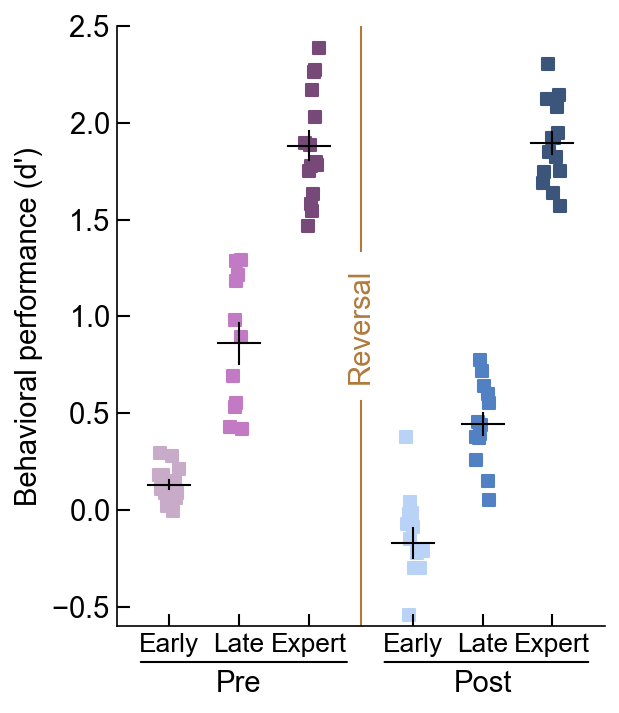

In [50]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25
#switch_offset = 0
################################################################################################################

#Plot figure

data = [pre_early_dps,pre_late_dps,pre_expert_dps,post_early_dps,post_late_dps,post_expert_dps]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

sz = 35
width = 0.3

for idx,column in enumerate(data):
    Y = ilep.rmnan(column)
    X = np.random.uniform(-width/2,width/2,size=len(Y)) + idx
    
    
    mean = np.mean(Y)
    SEM = sem(Y)
    if idx<3:
        ax.scatter(X-switch_offset,Y,s=sz,color=PHASE_COLORS[idx],marker='s')
        ax.plot([idx-switch_offset-width,idx-switch_offset+width],[mean]*2,color='k',lw=1)
        ax.plot([idx-switch_offset]*2,[mean-SEM,mean+SEM],color='k',lw=1)
        
    else:
        ax.scatter(X+switch_offset,Y,s=sz,color=PHASE_COLORS[idx],marker='s')
        ax.plot([idx+switch_offset-width,idx+switch_offset+width],[mean]*2,color='k',lw=1)
        ax.plot([idx+switch_offset]*2,[mean-SEM,mean+SEM],color='k',lw=1)
    
    
################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([-0.6,2.5])
ylab = ax.set_ylabel('Behavioral performance (d\')')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
# fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\sum_behavior.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')